<a href="https://colab.research.google.com/github/Gauranga2022/Time-Series-analysis/blob/main/Stock_Price_Volatility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages

In [264]:
pip install arch

In [265]:
from random import gauss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Reading the files

In [266]:
df1 = pd.read_csv("/content/NIFTY50.NS.csv")
df2 = pd.read_csv("/content/NSEBANK.NS.csv")
df3 = pd.read_csv("/content/RELIANCE.NS.csv")
df4 = pd.read_csv("/content/TCS.NS.csv")

In [267]:
df1.shape, df2.shape, df3.shape, df4.shape, df1 == df2

((4003, 7),
 (4003, 7),
 (7026, 7),
 (5301, 7),
       Date   Open   High    Low  Close  Adj Close  Volume
 0     True  False  False  False  False      False    True
 1     True  False  False  False  False      False    True
 2     True  False  False  False  False      False    True
 3     True  False  False  False  False      False    True
 4     True  False  False  False  False      False    True
 ...    ...    ...    ...    ...    ...        ...     ...
 3998  True  False  False  False  False      False   False
 3999  True  False  False  False  False      False   False
 4000  True  False  False  False  False      False   False
 4001  True  False  False  False  False      False   False
 4002  True  False  False  False  False      False   False
 
 [4003 rows x 7 columns])

In [268]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [269]:
df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df1.mean())
df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df2.mean())
df3[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df3[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df3.mean())
df4[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df4[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df4.mean())

<ipython-input-269-e86c2ef3d0be>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df1.mean())
<ipython-input-269-e86c2ef3d0be>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df2.mean())
<ipython-input-269-e86c2ef3d0be>:3: FutureWarning: The default value of numeric_only i

In [270]:
df1.info(), df2.info(), df3.info(), df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4003 non-null   object 
 1   Open       4003 non-null   float64
 2   High       4003 non-null   float64
 3   Low        4003 non-null   float64
 4   Close      4003 non-null   float64
 5   Adj Close  4003 non-null   float64
 6   Volume     4003 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4003 non-null   object 
 1   Open       4003 non-null   float64
 2   High       4003 non-null   float64
 3   Low        4003 non-null   float64
 4   Close      4003 non-null   float64
 5   Adj Close  4003 non-null   float64
 6   Volume     4003 non-null   float64
dtypes: float6

(None, None, None, None)

In [271]:
df1['Close'].isna().sum(), df2['Close'].isna().sum(), df3['Close'].isna().sum(), df4['Close'].isna().sum()

(0, 0, 0, 0)

### Finding the Log returns

In [272]:
dic = {}
for i in range(4):
  dic[i+1] = []
dic

{1: [], 2: [], 3: [], 4: []}

In [273]:
for i in range(4003):
  dic[1].append(df1['Close'][i])
for i in range(4003):
  dic[2].append(df2['Close'][i])
for i in range(7026):
  dic[3].append(df3['Close'][i])
for i in range(5301):
  dic[4].append(df4['Close'][i])
dic[1][2:10], dic[2][2:10], dic[3][2:10], dic[4][2:10]

([4732.350098,
  4747.549805,
  4837.549805,
  4932.200195,
  4938.850098,
  4940.5,
  5000.549805,
  5021.350098],
 [7401.850098,
  7390.149902,
  7464.5,
  7650.899902,
  7629.149902,
  7755.899902,
  7833.649902,
  8042.200195],
 [15.913584,
  15.766594,
  15.658285,
  15.031645,
  14.598411,
  14.2232,
  14.668038,
  14.513312],
 [36.462502,
  36.462502,
  36.375,
  35.474998,
  36.462502,
  38.25,
  39.900002,
  42.299999])

In [274]:
log_ret = {}
for i in range(4):
  log_ret[i+1] = [0]
log_ret

{1: [0], 2: [0], 3: [0], 4: [0]}

In [275]:
for j in log_ret.keys():
  for i in range(1,len(dic[j])):
    log_ret[j].append(np.log(dic[j][i-1]/dic[j][i]))
len(log_ret.keys()), [len(log_ret[j]) for j in range(1,5)]

(4, [4003, 4003, 7026, 5301])

### Plots of log returns

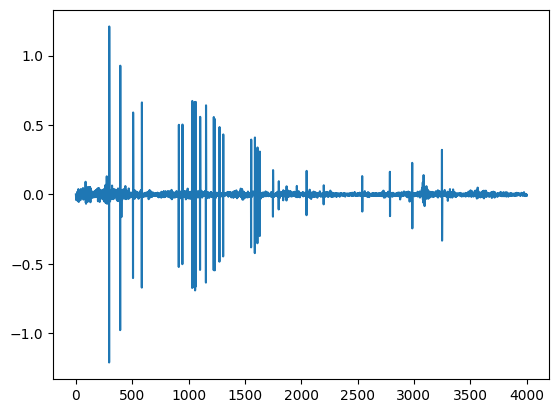

In [276]:
plt.plot(log_ret[1])

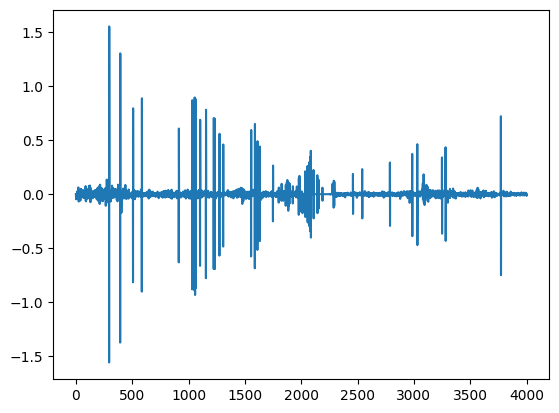

In [277]:
plt.plot(log_ret[2])

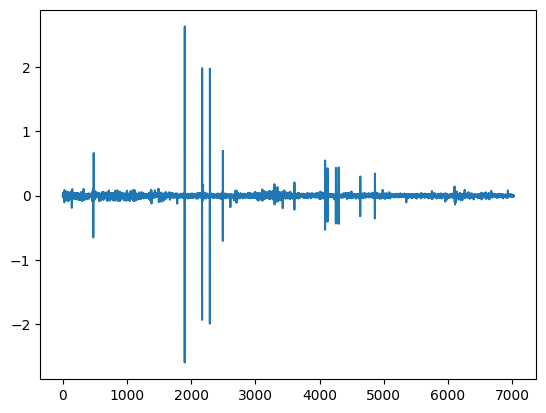

In [278]:
plt.plot(log_ret[3])

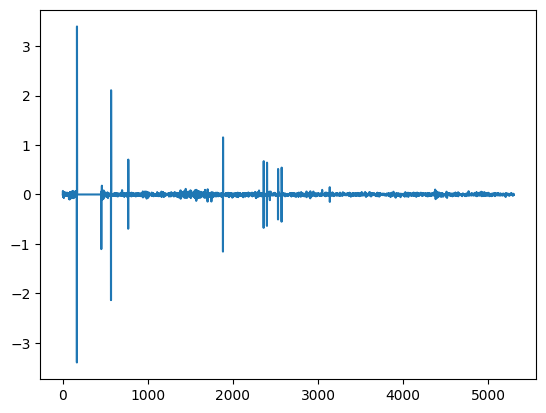

In [279]:
plt.plot(log_ret[4])

## GARCH(p=2,q=2) Model; Have used different values of (p,q)

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
volatility = \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$



### Volatility dictionary of lists and plots of volatility

In [280]:
n1,n2,n3,n4 = len(log_ret[1]), len(log_ret[2]), len(log_ret[3]), len(log_ret[4])

vols = {}
for i in range(1,5):
  vols[i] = []

for i in range(n1):
    new_vol = (1/gauss(0,1))*log_ret[1][i]
    vols[1].append(new_vol)

for i in range(n2):
    new_vol = (1/gauss(0,1))*log_ret[2][i]
    vols[2].append(new_vol)

for i in range(n3):
    new_vol = (1/gauss(0,1))*log_ret[3][i]
    vols[3].append(new_vol)

for i in range(n4):
    new_vol = (1/gauss(0,1))*log_ret[4][i]
    vols[4].append(new_vol)


(-1.0, 1.0)

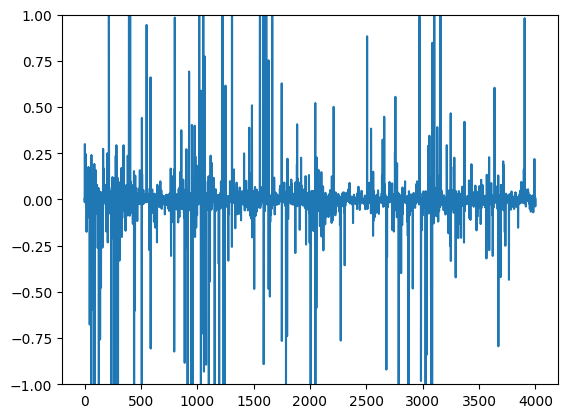

In [281]:
plt.plot(vols[1])
plt.ylim(-1, 1)

(-1.0, 1.0)

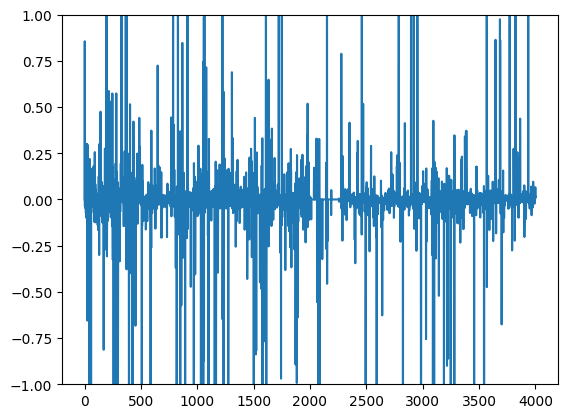

In [282]:
plt.plot(vols[2])
plt.ylim(-1,1)

(-1.0, 1.0)

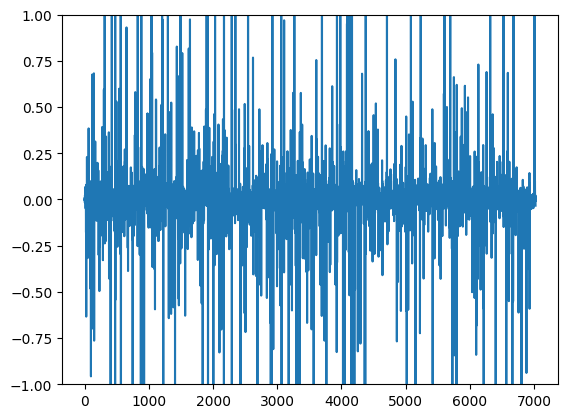

In [283]:
plt.plot(vols[3])
plt.ylim(-1,1)

(-1.0, 1.0)

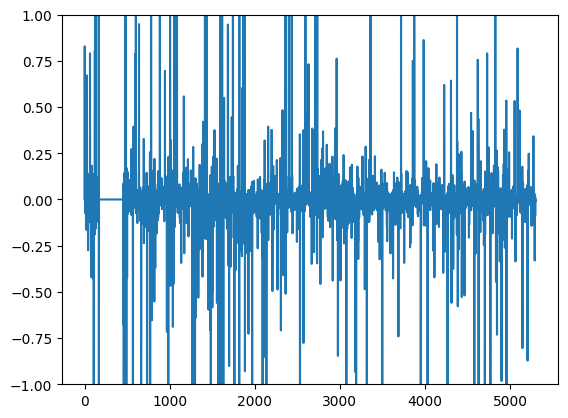

In [284]:
plt.plot(vols[4])
plt.ylim(-1, 1)

### PACF plots

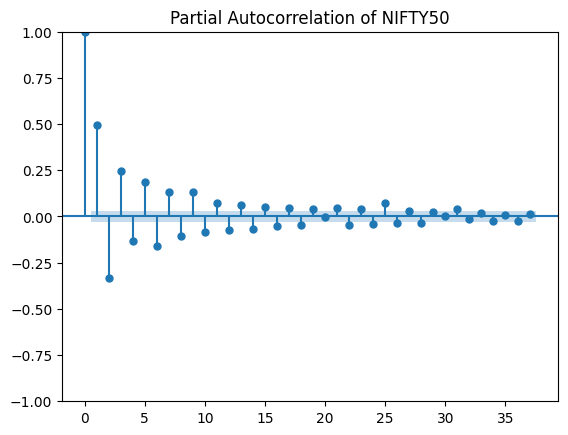

In [285]:
plot_pacf(np.array(log_ret[1])**2)
plt.title("Partial Autocorrelation of NIFTY50")
plt.show()

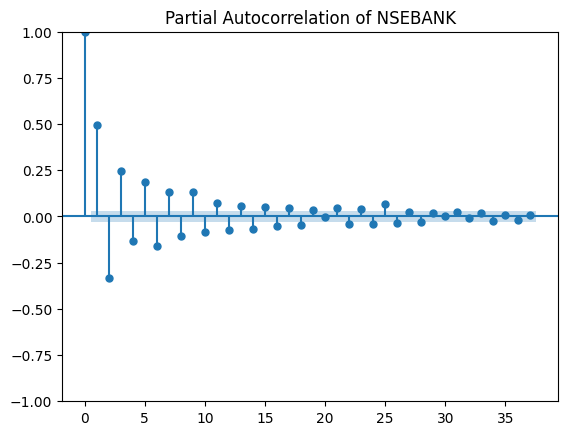

In [25]:
plot_pacf(np.array(log_ret[2])**2)
plt.title("Partial Autocorrelation of NSEBANK")
plt.show()

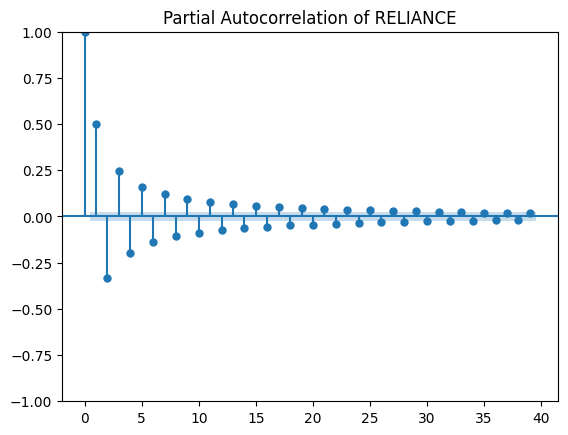

In [26]:
plot_pacf(np.array(log_ret[3])**2)
plt.title("Partial Autocorrelation of RELIANCE")
plt.show()

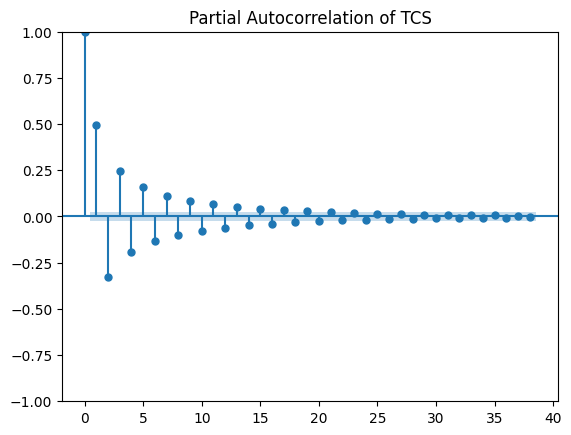

In [27]:
plot_pacf(np.array(log_ret[4])**2)
plt.title("Partial Autocorrelation of TCS")
plt.show()

### Fit the GARCH model

NIFTY50


In [ ]:
test_size = int(0.60*len(log_ret[1]))
train, test = log_ret[1][:-test_size], log_ret[1][-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit()

In [203]:
model_fit.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1872.69
Distribution:                  Normal   AIC:                          -3737.38
Method:            Maximum Likelihood   BIC:                          -3715.86
                                        No. Observations:                 1602
Date:                Tue, Dec 05 2023   Df Residuals:                     1601
Time:                        21:40:02   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu      

In [204]:
predictions = model_fit.forecast(horizon=test_size)

Volatility Prediction

(-1.5, 1.5)

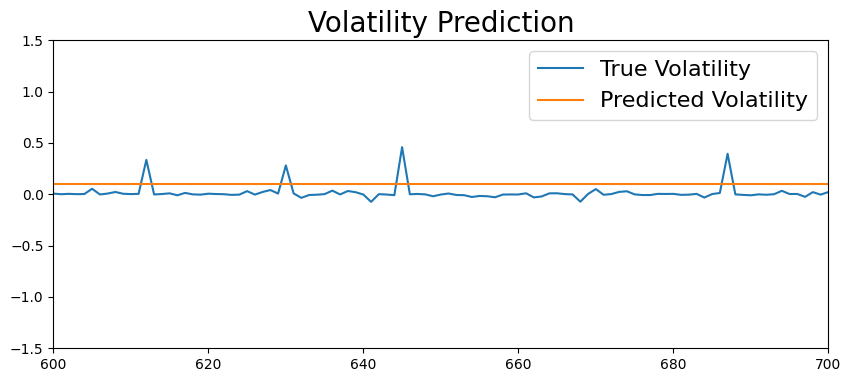

In [205]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[1][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(600,700)
plt.ylim(-1.5,1.5)

Long Term Volatility Prediction

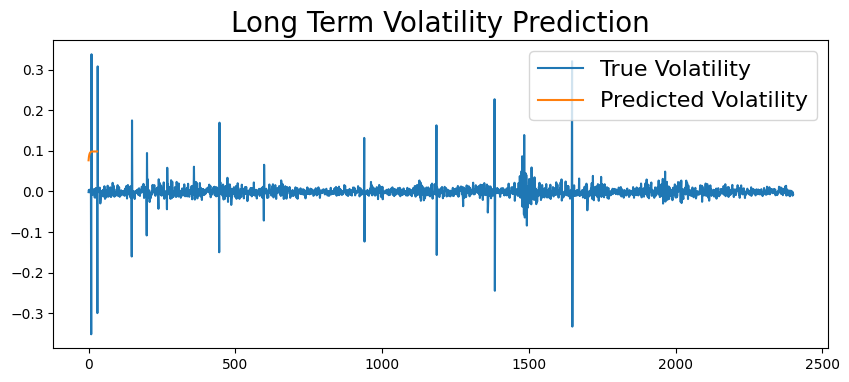

In [206]:
predictions_long_term = model_fit.forecast(horizon=30)
plt.figure(figsize=(10,4))
true, = plt.plot(log_ret[1][-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

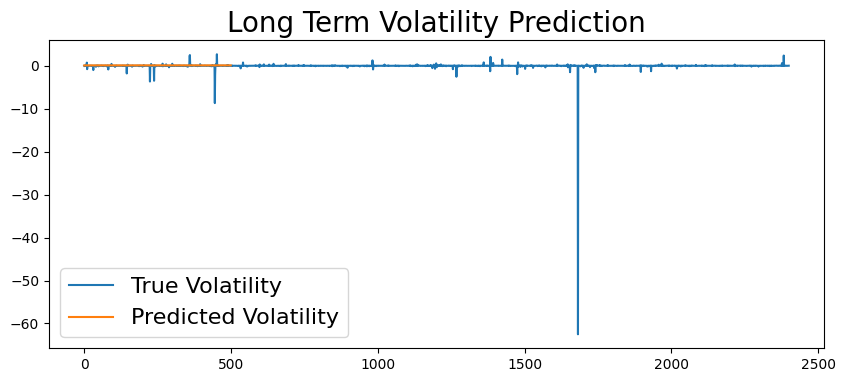

In [207]:
predictions_long_term = model_fit.forecast(horizon=500)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[1][-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

Rolling Forecast

In [ ]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[1][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

(-1.5, 1.5)

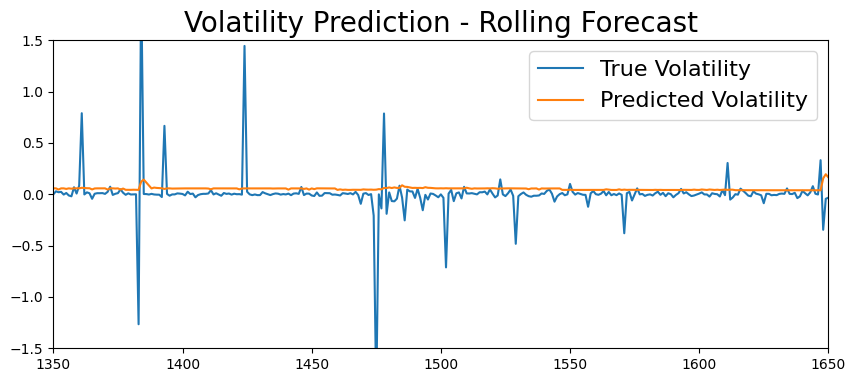

In [209]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[1][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(1350,1650)
plt.ylim(-1.5,1.5)

NSEBANK


In [ ]:
test_size = int(0.60*len(log_ret[2]))
train, test = log_ret[2][:-test_size], log_ret[2][-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit()

In [222]:
model_fit.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1525.51
Distribution:                  Normal   AIC:                          -3043.03
Method:            Maximum Likelihood   BIC:                          -3021.51
                                        No. Observations:                 1602
Date:                Tue, Dec 05 2023   Df Residuals:                     1601
Time:                        21:49:45   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         

In [223]:
predictions = model_fit.forecast(horizon=test_size)

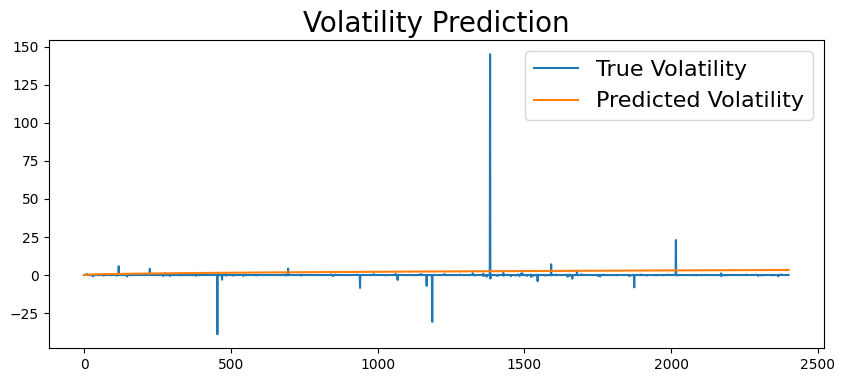

In [225]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[2][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
# plt.xlim(600,700)
# plt.ylim(-1.5,1.5)

In [ ]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[2][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

(-1.5, 1.5)

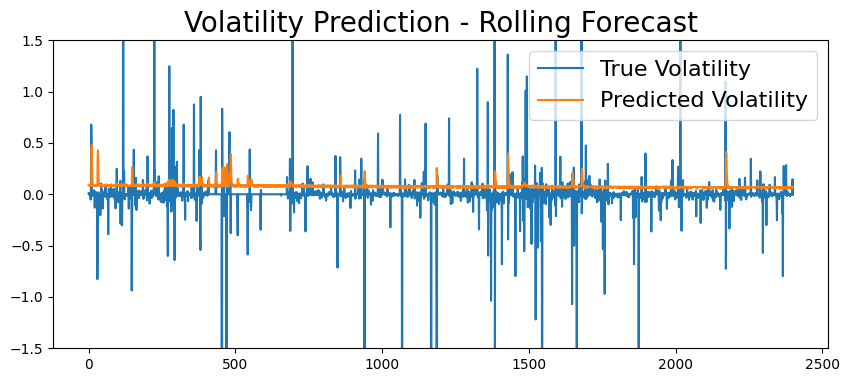

In [227]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[2][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
#plt.xlim(1350,1650)
plt.ylim(-1.5,1.5)

RELIANCE

In [ ]:
test_size = int(0.60*len(log_ret[3]))
train, test = log_ret[3][:-test_size], log_ret[3][-test_size:]
model = arch_model(train, p=1, q=0)
model_fit = model.fit()

In [235]:
model_fit.summary

<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                3122.44
Distribution:                  Normal   AIC:                          -6238.87
Method:            Maximum Likelihood   BIC:                          -6221.05
                                        No. Observations:                 2811
Date:                Tue, Dec 05 2023   Df Residuals:                     2810
Time:                        21:59:25   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         

In [236]:
predictions = model_fit.forecast(horizon=test_size)

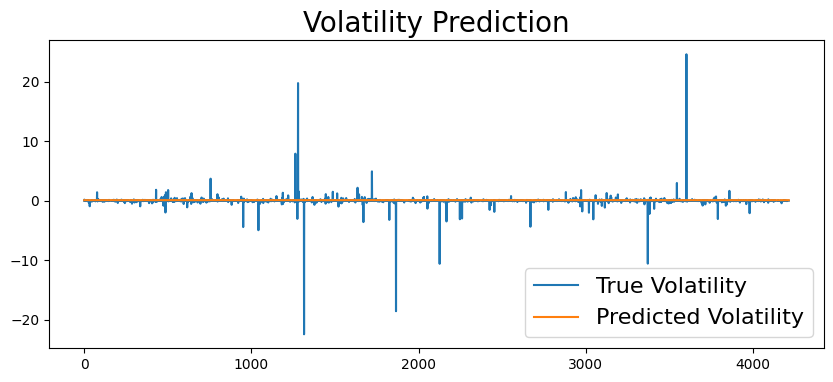

In [239]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[3][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
# plt.xlim(600,700)
# plt.ylim(-1.5,1.5)

In [ ]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[3][:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

(-1.5, 1.5)

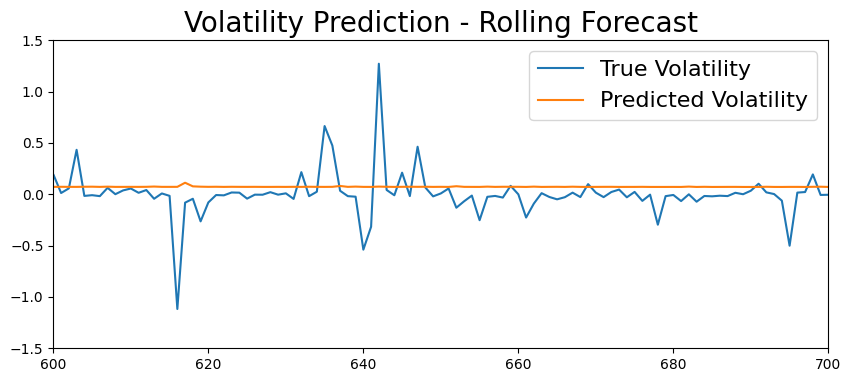

In [241]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[3][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(600,700)
plt.ylim(-1.5,1.5)

TCS

In [ ]:
test_size = int(0.60*len(log_ret[4]))
train, test = log_ret[4][:-test_size], log_ret[4][-test_size:]
model = arch_model(train, p=1, q=0)
model_fit = model.fit()

In [254]:
model_fit.summary

<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2073.79
Distribution:                  Normal   AIC:                          -4141.58
Method:            Maximum Likelihood   BIC:                          -4124.60
                                        No. Observations:                 2121
Date:                Tue, Dec 05 2023   Df Residuals:                     2120
Time:                        22:10:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0232  

In [255]:
predictions = model_fit.forecast(horizon=test_size)

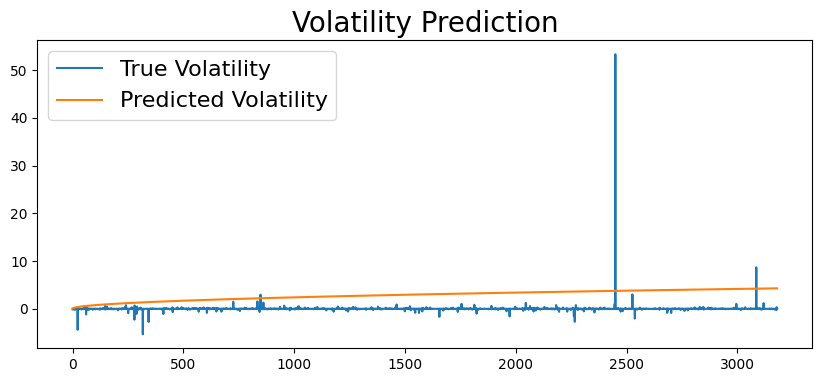

In [256]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[4][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
# plt.xlim(600,700)
# plt.ylim(-1.5,1.5)

In [ ]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[4][:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

(-1.5, 1.5)

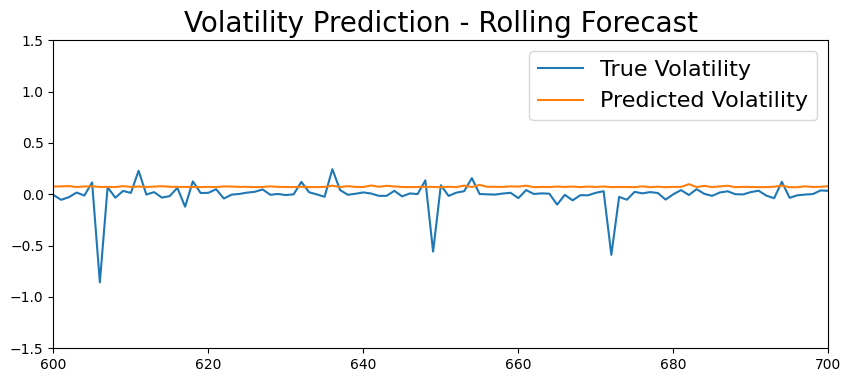

In [258]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[4][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(600,700)
plt.ylim(-1.5,1.5)